<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L8_4Hole_Detection_Fence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

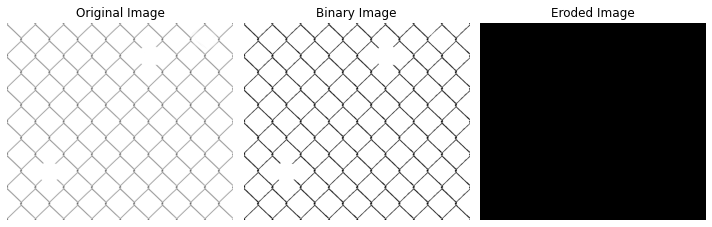

True

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

# Load image from URL and convert to grayscale
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/fence.jpg'
with urllib.request.urlopen(url) as url_f:
    s = url_f.read()
    arr = np.asarray(bytearray(s), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)

# Threshold image
level, bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform erosion with a cross structuring element
length = 101
nhood = np.zeros((length, length), dtype=np.uint8)
nhood[length//2, :] = 1
nhood[:, length//2] = 1
se = cv2.bitwise_not(cv2.getStructuringElement(cv2.MORPH_RECT, (length, length)))
se[nhood > 0] = 1
bw1 = cv2.erode(bw, se)

# Show and save images
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(bw, cmap='gray')
axs[1].set_title('Binary Image')
axs[2].imshow(bw1, cmap='gray')
axs[2].set_title('Eroded Image')
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

cv2.imwrite('Binary_Erosion_Fence_BW.jpg', bw)
cv2.imwrite('Binary_Erosion_Fence_Hole_Detection.jpg', bw1)
